#Problem Statement
=====================
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.
The chain already has restaurants in various cities and you have data for profits and populations from the cities.
You also have data on cities that are candidates for a new restaurant.
For these cities, you have the city population.
Can you use the data to help you identify which cities may potentially give your business higher profits?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [3]:
df=pd.read_csv("data.csv")
df.head()

,size,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    97 non-null     float64
 1   profit  97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [ ]:
X=df.iloc[:,0:1]
Y=df.iloc[:,-1:]
X_train=np.array(X)
Y_train=np.array(Y)

Visulize the data.

Text(0.5, 1.0, 'size vs profit for resturent outlet')

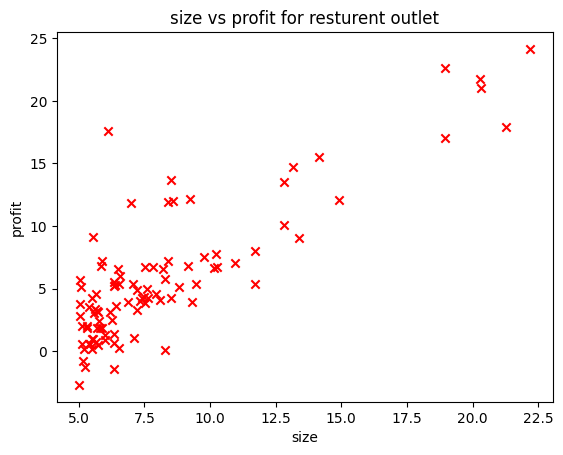

In [22]:
plt.scatter(df['size'],df['profit'],c='red',marker='x')
plt.xlabel("size")
plt.ylabel("profit")
plt.title("size vs profit for resturent outlet")
#we will surely use linear regression...

In [23]:
mu = np.mean(X_train)
sigma = np.std(X_train)
X_norm = (X - mu) / sigma
m=len(Y_train)
X_prep = np.c_[X_norm,np.ones(m)]  # shape: (m, 2) #[[2.2,1],[1.32,1],[232.12,1]] like this okay:
theta = np.ones(2)
print(theta) # why: i am initializing w,b with 1,1 
print(m)
print(X_prep)
X_prep.shape


[1. 1.]
97
[[-0.53240565  1.        ]
 [-0.68368294  1.        ]
 [ 0.09319761  1.        ]
 [-0.30042464  1.        ]
 [-0.5974206   1.        ]
 [ 0.0579498   1.        ]
 [-0.17751184  1.        ]
 [ 0.10865262  1.        ]
 [-0.4347144   1.        ]
 [-0.80656976  1.        ]
 [-0.63614904  1.        ]
 [ 1.55957946  1.        ]
 [-0.63009691  1.        ]
 [ 0.06457337  1.        ]
 [-0.6543314   1.        ]
 [-0.72220358  1.        ]
 [-0.46609197  1.        ]
 [-0.78695878  1.        ]
 [-0.44941614  1.        ]
 [-0.28286567  1.        ]
 [-0.51188555  1.        ]
 [ 3.14560127  1.        ]
 [-0.69344947  1.        ]
 [-0.47630007  1.        ]
 [-0.67402031  1.        ]
 [ 2.80143506  1.        ]
 [ 1.21255602  1.        ]
 [ 0.72656735  1.        ]
 [ 1.30294835  1.        ]
 [ 3.64769432  1.        ]
 [-0.75519159  1.        ]
 [-0.40790839  1.        ]
 [ 0.28270982  1.        ]
 [-0.58910866  1.        ]
 [ 0.01332508  1.        ]
 [-0.05880697  1.        ]
 [-0.0165979   1.

(97, 2)

cost function here will be
j(w,b)=1/2m*sigma(f-y)^2;

In [43]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X,theta)         # shape: (m,)
   
    print(predictions)
    error = predictions - y.ravel()    # flatten y to match shape
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

# Try with theta = [2, 1]
theta_test = np.array([2, 1])
cost = compute_cost(X_prep, Y_train, theta_test)
print("Cost with theta [2,1]:", cost)


[-0.0648113  -0.36736588  1.18639523  0.39915073 -0.1948412   1.1158996
  0.64497632  1.21730525  0.13057121 -0.61313951 -0.27229808  4.11915892
 -0.26019381  1.12914675 -0.30866281 -0.44440716  0.06781607 -0.57391755
  0.10116772  0.43426867 -0.02377111  7.29120255 -0.38689893  0.04739987
 -0.34804062  6.60287012  3.42511203  2.45313469  3.6058967   8.29538865
 -0.51038317  0.18418321  1.56541963 -0.17821732  1.02665015  0.88238607
  0.96680419 -0.32653348  3.429268    0.06158211 -0.43012101  0.33644754
  2.84327632 -0.23956982  0.82591683  0.44585343 -0.60503537 -0.22517977
  2.83912035 -0.36014488  0.67812017 -0.48165503  0.61770277  0.71079648
  0.05088049  0.06443934  0.02043802 -0.3091823   1.5976284   1.67212415
  1.34577665 -0.54835834  7.81537418  4.50566407  6.61014306  0.5108424
  1.07028783  2.07857795 -0.38206762  7.32808678  2.02662834  0.57125981
 -0.11878696  0.51484252 -0.62752956  0.16262412  0.67728898 -0.6225424
  2.09831881 -0.58555427 -0.2626874  -0.54363093  0.06

In [44]:
theta=np.array([2,1])
cost=compute_cost(X_prep,Y_train,theta)
print(cost)

[-0.0648113  -0.36736588  1.18639523  0.39915073 -0.1948412   1.1158996
  0.64497632  1.21730525  0.13057121 -0.61313951 -0.27229808  4.11915892
 -0.26019381  1.12914675 -0.30866281 -0.44440716  0.06781607 -0.57391755
  0.10116772  0.43426867 -0.02377111  7.29120255 -0.38689893  0.04739987
 -0.34804062  6.60287012  3.42511203  2.45313469  3.6058967   8.29538865
 -0.51038317  0.18418321  1.56541963 -0.17821732  1.02665015  0.88238607
  0.96680419 -0.32653348  3.429268    0.06158211 -0.43012101  0.33644754
  2.84327632 -0.23956982  0.82591683  0.44585343 -0.60503537 -0.22517977
  2.83912035 -0.36014488  0.67812017 -0.48165503  0.61770277  0.71079648
  0.05088049  0.06443934  0.02043802 -0.3091823   1.5976284   1.67212415
  1.34577665 -0.54835834  7.81537418  4.50566407  6.61014306  0.5108424
  1.07028783  2.07857795 -0.38206762  7.32808678  2.02662834  0.57125981
 -0.11878696  0.51484252 -0.62752956  0.16262412  0.67728898 -0.6225424
  2.09831881 -0.58555427 -0.2626874  -0.54363093  0.06